In [89]:
import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split

In [90]:
dt = pd.read_csv("OneriVerisetiENG.csv") #csv dosyasını okuduk

In [91]:
dt # verisetimiz

,Id,Sehir,BolgeId,Bolge,N,P,K,pH,Sicaklik,Nem,YagmurOrani,Urun
0,1,Adana,1,Akdeniz Bolgesi,450.0,20.0,280.0,7.8,27,60,900,Pamuk
1,1,Adana,1,Akdeniz Bolgesi,450.0,20.0,280.0,7.8,25,70,1100,Narenciye
2,1,Adana,1,Akdeniz Bolgesi,450.0,20.0,280.0,7.8,14,50,600,Bugday
3,1,Adana,1,Akdeniz Bolgesi,450.0,20.0,280.0,7.8,25,60,800,Misir
4,1,Adana,1,Akdeniz Bolgesi,450.0,20.0,280.0,7.8,27,60,600,Karpuz
...,...,...,...,...,...,...,...,...,...,...,...,...
392,81,Duzce,6,Karadeniz Bolgesi,1000.0,8.0,175.0,6.0,17,80,1100,Findik
393,81,Duzce,6,Karadeniz Bolgesi,1000.0,8.0,175.0,6.0,15,55,425,Bugday
394,81,Duzce,6,Karadeniz Bolgesi,1000.0,8.0,175.0,6.0,21,70,700,Armut
395,81,Duzce,6,Karadeniz Bolgesi,1000.0,8.0,175.0,6.0,20,65,800,Kiraz


In [92]:
dt.drop("Bolge",axis=1,inplace=True) # text olduğu için "Bolge" yi sildim

In [93]:
dt.drop("Sehir",axis=1,inplace=True) # text olduğu için "Sehir" i sildim

In [94]:
dt

,Id,BolgeId,N,P,K,pH,Sicaklik,Nem,YagmurOrani,Urun
0,1,1,450.0,20.0,280.0,7.8,27,60,900,Pamuk
1,1,1,450.0,20.0,280.0,7.8,25,70,1100,Narenciye
2,1,1,450.0,20.0,280.0,7.8,14,50,600,Bugday
3,1,1,450.0,20.0,280.0,7.8,25,60,800,Misir
4,1,1,450.0,20.0,280.0,7.8,27,60,600,Karpuz
...,...,...,...,...,...,...,...,...,...,...
392,81,6,1000.0,8.0,175.0,6.0,17,80,1100,Findik
393,81,6,1000.0,8.0,175.0,6.0,15,55,425,Bugday
394,81,6,1000.0,8.0,175.0,6.0,21,70,700,Armut
395,81,6,1000.0,8.0,175.0,6.0,20,65,800,Kiraz


In [95]:
dt["Urun"].sort_values().unique() #ürünlerimiz

array(['Antepfistigi', 'Armut', 'Arpa', 'Aycicegi', 'Balkabagi', 'Bamya',
       'Bezelye', 'Biber', 'Borulce', 'Bugday', 'Cavdar', 'Cay', 'Ceviz',
       'Cilek', 'Domates', 'Elma', 'Erik', 'Fasulye', 'Findik', 'Fistik',
       'Gul', 'Hashas', 'Incir', 'Karpuz', 'Kavun', 'Kayisi', 'Kestane',
       'Kiraz', 'Kivi', 'Lahana', 'Limon', 'Marul', 'Mercimek', 'Misir',
       'Muz', 'Nar', 'Narenciye', 'Nohut', 'Pamuk', 'Pancar', 'Patates',
       'Patlican', 'Pazi', 'Pirinc', 'Salatalik', 'Sarimsak', 'Seftali',
       'Sogan', 'Tutun', 'Uzum', 'Yonca', 'Yulaf', 'Zeytin'], dtype=object)

In [96]:
dt_urun_dict = { # ürün sözlüğümüz

"Armut": 1,
"Arpa": 2,
"Aycicegi": 3,
"Balkabagi": 4,
"Bamya": 5,
"Bezelye": 6,
"Biber": 7,
"Borulce": 8,
"Bugday": 9,
"Cavdar": 10,
"Cay": 11,
"Ceviz": 12,
"Cilek": 13,
"Domates": 14,
"Elma": 15,
"Erik": 16,
"Fasulye": 17,
"Findik": 18,
"Fistik": 19,
"Gul": 20,
"Hashas": 21,
"Incir": 22,
"Karpuz": 23,
"Kavun": 24,
"Kayisi": 25,
"Kestane": 26,
"Kiraz": 27,
"Kivi": 28,
"Lahana": 29,
"Limon": 30,
"Marul": 31,
"Mercimek": 32,
"Misir": 33,
"Muz": 34,
"Nar": 35,
"Narenciye": 36,
"Nohut": 37,
"Pamuk": 38,
"Pancar": 39,
"Patates": 40,
"Patlican": 41,
"Pazi": 42,
"Pirinc": 43,
"Salatalik": 44,
"Sarimsak": 45,
"Seftali": 46,
"Sogan": 47,
"Tutun": 48,
"Uzum": 49,
"Yonca": 50,
"Yulaf": 51,
"Zeytin": 52,
"Antepfistigi":53


}

In [97]:
dt["Urun"] = dt["Urun"].map(dt_urun_dict) #"Urun" sutundaki textleri sözlük karşılıklarıyla eşledim (map)

In [98]:
dt # Tablomuzun güncel hali

,Id,BolgeId,N,P,K,pH,Sicaklik,Nem,YagmurOrani,Urun
0,1,1,450.0,20.0,280.0,7.8,27,60,900,38
1,1,1,450.0,20.0,280.0,7.8,25,70,1100,36
2,1,1,450.0,20.0,280.0,7.8,14,50,600,9
3,1,1,450.0,20.0,280.0,7.8,25,60,800,33
4,1,1,450.0,20.0,280.0,7.8,27,60,600,23
...,...,...,...,...,...,...,...,...,...,...
392,81,6,1000.0,8.0,175.0,6.0,17,80,1100,18
393,81,6,1000.0,8.0,175.0,6.0,15,55,425,9
394,81,6,1000.0,8.0,175.0,6.0,21,70,700,1
395,81,6,1000.0,8.0,175.0,6.0,20,65,800,27


In [99]:
X = dt.drop("Urun",axis=1) # eğitim ve test değerlerim 
y = dt["Urun"] # eğitim sonucu ulaşmak istediğim değerler


In [100]:
X 

,Id,BolgeId,N,P,K,pH,Sicaklik,Nem,YagmurOrani
0,1,1,450.0,20.0,280.0,7.8,27,60,900
1,1,1,450.0,20.0,280.0,7.8,25,70,1100
2,1,1,450.0,20.0,280.0,7.8,14,50,600
3,1,1,450.0,20.0,280.0,7.8,25,60,800
4,1,1,450.0,20.0,280.0,7.8,27,60,600
...,...,...,...,...,...,...,...,...,...
392,81,6,1000.0,8.0,175.0,6.0,17,80,1100
393,81,6,1000.0,8.0,175.0,6.0,15,55,425
394,81,6,1000.0,8.0,175.0,6.0,21,70,700
395,81,6,1000.0,8.0,175.0,6.0,20,65,800


In [101]:
y.reset_index()

,index,Urun
0,0,38
1,1,36
2,2,9
3,3,33
4,4,23
...,...,...
392,392,18
393,393,9
394,394,1
395,395,27


In [102]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=42)  # eğtim ve test değerlerine ayırma 

In [103]:
X_train # modeli eğitmek için

,Id,BolgeId,N,P,K,pH,Sicaklik,Nem,YagmurOrani
262,55,6,1000.0,8.0,175.0,6.0,17,80,1100
113,23,2,750.0,12.0,140.0,7.5,14,50,600
176,36,2,750.0,12.0,140.0,7.5,15,50,400
63,13,2,750.0,12.0,140.0,7.5,17,70,650
245,51,5,900.0,9.0,225.0,8.0,25,60,500
...,...,...,...,...,...,...,...,...,...
71,15,1,450.0,20.0,280.0,7.8,20,55,700
106,22,7,750.0,14.0,250.0,7.0,24,60,500
270,56,4,1150.0,15.0,300.0,7.7,23,55,350
348,72,4,1150.0,15.0,300.0,7.7,30,55,700


In [104]:
X_test # modeli test etmek için (modelin genelleme yeteneğini ölçmek için)

,Id,BolgeId,N,P,K,pH,Sicaklik,Nem,YagmurOrani
114,23,2,750.0,12.0,140.0,7.5,20,60,700
278,58,5,900.0,9.0,225.0,8.0,17,55,400
237,49,2,750.0,12.0,140.0,7.5,17,70,700
57,12,2,750.0,12.0,140.0,7.5,20,65,700
72,15,1,450.0,20.0,280.0,7.8,20,65,700
...,...,...,...,...,...,...,...,...,...
366,75,2,750.0,12.0,140.0,7.5,20,72,650
340,70,5,900.0,9.0,225.0,8.0,20,70,750
132,27,4,1150.0,15.0,300.0,7.7,14,50,600
3,1,1,450.0,20.0,280.0,7.8,25,60,800


In [105]:
from sklearn.preprocessing import MinMaxScaler


ms = MinMaxScaler() # ön işleme yöntemi, veri setindeki değerleri [0,1] aralığına ölçeklendirir
X_train=ms.fit_transform(X_train) # fit ile veri setindeki minimum ve maksimum değerler öğrenilir, transform ile de bu değerlere göre ölçeklendirme yapılır
X_test=ms.transform(X_test) # test setini eğitim setine göre ölçeklendiririz

In [106]:
X_train

array([[0.675     , 0.83333333, 0.78571429, ..., 0.31578947, 0.95238095,
        0.45454545],
       [0.275     , 0.16666667, 0.42857143, ..., 0.15789474, 0.23809524,
        0.15151515],
       [0.4375    , 0.16666667, 0.42857143, ..., 0.21052632, 0.23809524,
        0.03030303],
       ...,
       [0.6875    , 0.5       , 1.        , ..., 0.63157895, 0.35714286,
        0.        ],
       [0.8875    , 0.5       , 1.        , ..., 1.        , 0.35714286,
        0.21212121],
       [0.25      , 0.5       , 1.        , ..., 0.21052632, 0.23809524,
        0.03030303]])

In [107]:
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()# ön işleme yöntemi, veri setindeki değerlerin ortalamasını 0, standart sapmasını 1 yapar.  (x-ort/ss)
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [108]:
#modellerimiz

from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier 
from sklearn.metrics import accuracy_score



In [109]:
modeller = {
'LogisticRegression': LogisticRegression(), 
'GaussianNB': GaussianNB(),
'SVC': SVC(),
'KNeighborsClassifier': KNeighborsClassifier(),
'DecisionTreeClassifier': DecisionTreeClassifier(),
'ExtraTreeClassifier': ExtraTreeClassifier(),
'RandomForestClassifier': RandomForestClassifier(),
'BaggingClassifier': BaggingClassifier(),
'GradientBoostingClassifier': GradientBoostingClassifier()
}

In [110]:
#Kullanıcağım modeli seçmek için modellerin doğruluk oranlarını ölçüyorum

for isim, model in modeller.items(): 
 model.fit(X_train, y_train)
 y_tahmin = model.predict(X_test)
 oran = accuracy_score (y_test, y_tahmin) 
 print(f" {isim} modelinin doğruluk oranı: {oran}")

 LogisticRegression modelinin doğruluk oranı: 0.4875
 GaussianNB modelinin doğruluk oranı: 0.6625
 SVC modelinin doğruluk oranı: 0.3
 KNeighborsClassifier modelinin doğruluk oranı: 0.3375
 DecisionTreeClassifier modelinin doğruluk oranı: 0.85
 ExtraTreeClassifier modelinin doğruluk oranı: 0.6375
 RandomForestClassifier modelinin doğruluk oranı: 0.825
 BaggingClassifier modelinin doğruluk oranı: 0.9
 GradientBoostingClassifier modelinin doğruluk oranı: 0.8125


In [111]:
# Doğruluk oranı yüksek olduğu için DecisionTreeClassifier modelini seçtim
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_tahmin = dtc.predict(X_test)
accuracy_score(y_test,y_tahmin)

0.8625

In [112]:
dt.columns

Index(['Id', 'BolgeId', 'N', 'P', 'K', 'pH', 'Sicaklik', 'Nem', 'YagmurOrani',
       'Urun'],
      dtype='object')

In [113]:


# Bölge ve şehir bilgileri için sözlük tanımları
bolge_dict = {"Marmara": 7, "Ege": 3, "Akdeniz": 1, "Ic Anadolu": 5,
    "Karadeniz": 6, "Dogu Anadolu": 2, "Guneydogu Anadolu": 4

}

sehir_dict = {
1: "Adana", 2: "Adiyaman", 3: "Afyonkarahisar", 4: "Agri", 5: "Amasya", 
6: "Ankara", 7: "Antalya", 8: "Artvin", 9: "Aydin", 10: "Balikesir", 11: "Bilecik", 
12: "Bingol", 13: "Bitlis", 14: "Bolu", 15: "Burdur", 16: "Bursa", 17: "Canakkale", 
18: "Cankiri", 19: "Corum", 20: "Denizli", 21: "Diyarbakir", 22: "Edirne", 23: "Elazig", 
24: "Erzincan", 25: "Erzurum", 26: "Eskisehir", 27: "Gaziantep", 28: "Giresun", 
29: "Gumushane", 30: "Hakkari", 31: "Hatay", 32: "Isparta", 33: "Mersin", 34: "Istanbul", 
35: "Izmir", 36: "Kars", 37: "Kastamonu", 38: "Kayseri", 39: "Kirklareli", 40: "Kirsehir", 
41: "Kocaeli", 42: "Konya", 43: "Kutahya", 44: "Malatya", 45: "Manisa", 46: "Kahramanmaras", 
47: "Mardin", 48: "Mugla", 49: "Mus", 50: "Nevsehir", 51: "Nigde", 52: "Ordu", 53: "Rize", 
54: "Sakarya", 55: "Samsun", 56: "Siirt", 57: "Sinop", 58: "Sivas", 59: "Tekirdag", 
60: "Tokat", 61: "Trabzon", 62: "Tunceli", 63: "Sanliurfa", 64: "Usak", 65: "Van", 
66: "Yozgat", 67: "Zonguldak", 68: "Aksaray", 69: "Bayburt", 70: "Karaman", 71: "Kirikkale", 
72: "Batman", 73: "Sirnak", 74: "Bartin", 75: "Ardahan", 76: "Igdir", 77: "Yalova", 
78: "Karabuk", 79: "Kilis", 80: "Osmaniye", 81: "Duzce"
}

# Bölgeye özgü N, P, K, pH değerleri
bolge_npk = {
    1:[450.0, 20.0, 280.0, 7.8],  # Akdeniz
    2:[750.0, 12.0, 140.0, 7.5],  # Doğu Anadolu
    3:[1100.0, 6.0, 220.0, 7.6],  # Ege
    4:[1150.0, 15.0, 300.0, 7.7],  # Güneydoğu Anadolu
    5:[900.0, 9.0, 225.0, 8.0],  # Iç Anadolu
    6:[1000.0, 8.0, 175.0, 6.0],  # Karadeniz
    7:[750.0, 14.0, 250.0, 7.0],  # Marmara
}

# Kullanıcıdan alınan bilgilerle tahmin yapan fonksiyon
def oneri(Bolge, Sehir, Sicaklik, Nem, YagmurOrani):
    

    Bolge = Bolge.strip().title()
    Sehir = Sehir.strip().title()

# Bölge ve şehir adını sayısal değere dönüştürme
    BolgeId = bolge_dict.get(Bolge, 0)
    Id = sehir_dict.get(Sehir, 0)
    
   

    # Bölgeye özgü N, P, K, pH değerlerini alıyoruz
    N, P, K , pH = bolge_npk[BolgeId]

    # Model için girdi hazırlığı
    ozellikler = np.array([[Id, BolgeId, N, P, K, pH, Sicaklik, Nem, YagmurOrani]])
    ms_ozellikler = ms.transform(ozellikler)
    sc_ms_ozellikler = sc.transform(ms_ozellikler)
    
    # Modelden tahmin alınıyor
    tahminimiz = dtc.predict(sc_ms_ozellikler).reshape(1, -1)
    return tahminimiz[0] # [0] ile dönen iki boyutlu listeyi tek boyutlu liste yaptım, (ör [[29]] -> [29] oldu )

# Kullanıcıdan bilgi alma
Bolge = "Karadeniz"
Sehir = "Rize"
Sicaklik = 20
Nem = 80
YagmurOrani = 1000
tahmin = oneri(Bolge, Sehir, Sicaklik, Nem, YagmurOrani)



print(f"Girilen Bolge: '{Bolge}'")
print(f"Girilen Sehir: '{Sehir}'")




Girilen Bolge: 'Karadeniz'
Girilen Sehir: 'Rize'


c:\Users\ketem\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [114]:
dt_urun_dict = {

"Armut": 1,
"Arpa": 2,
"Aycicegi": 3,
"Balkabagi": 4,
"Bamya": 5,
"Bezelye": 6,
"Biber": 7,
"Borulce": 8,
"Bugday": 9,
"Cavdar": 10,
"Cay": 11,
"Ceviz": 12,
"Cilek": 13,
"Domates": 14,
"Elma": 15,
"Erik": 16,
"Fasulye": 17,
"Findik": 18,
"Fistik": 19,
"Gul": 20,
"Hashas": 21,
"Incir": 22,
"Karpuz": 23,
"Kavun": 24,
"Kayisi": 25,
"Kestane": 26,
"Kiraz": 27,
"Kivi": 28,
"Lahana": 29,
"Limon": 30,
"Marul": 31,
"Mercimek": 32,
"Misir": 33,
"Muz": 34,
"Nar": 35,
"Narenciye": 36,
"Nohut": 37,
"Pamuk": 38,
"Pancar": 39,
"Patates": 40,
"Patlican": 41,
"Pazi": 42,
"Pirinc": 43,
"Salatalik": 44,
"Sarimsak": 45,
"Seftali": 46,
"Sogan": 47,
"Tutun": 48,
"Uzum": 49,
"Yonca": 50,
"Yulaf": 51,
"Zeytin": 52,
"Antepfistigi":53

}


reversed_dt_urun_dict = {value: key for key, value in dt_urun_dict.items()} # Yukarıdaki dictionary'yi ters çevirdim


array = np.array(tahmin)

mapped_values = [reversed_dt_urun_dict[value] for value in array] # list comprehension

In [115]:
print(mapped_values)

['Lahana']


In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

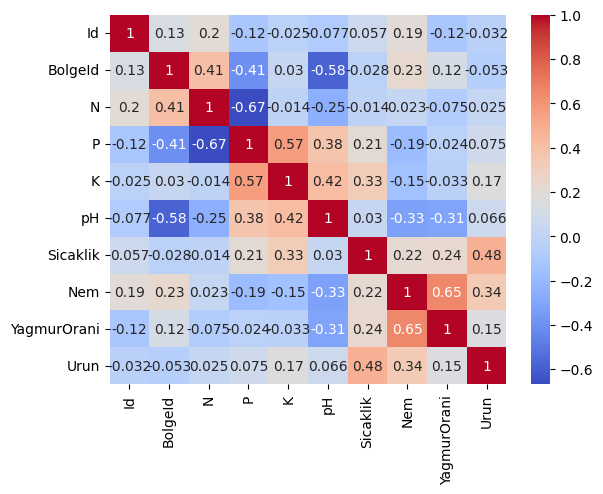

In [117]:
sns.heatmap(dt.corr(numeric_only=True), annot=True, cmap="coolwarm")
#coolwarm -> kırmızıya yaklaştıkça gibi düşünebilirsiniz

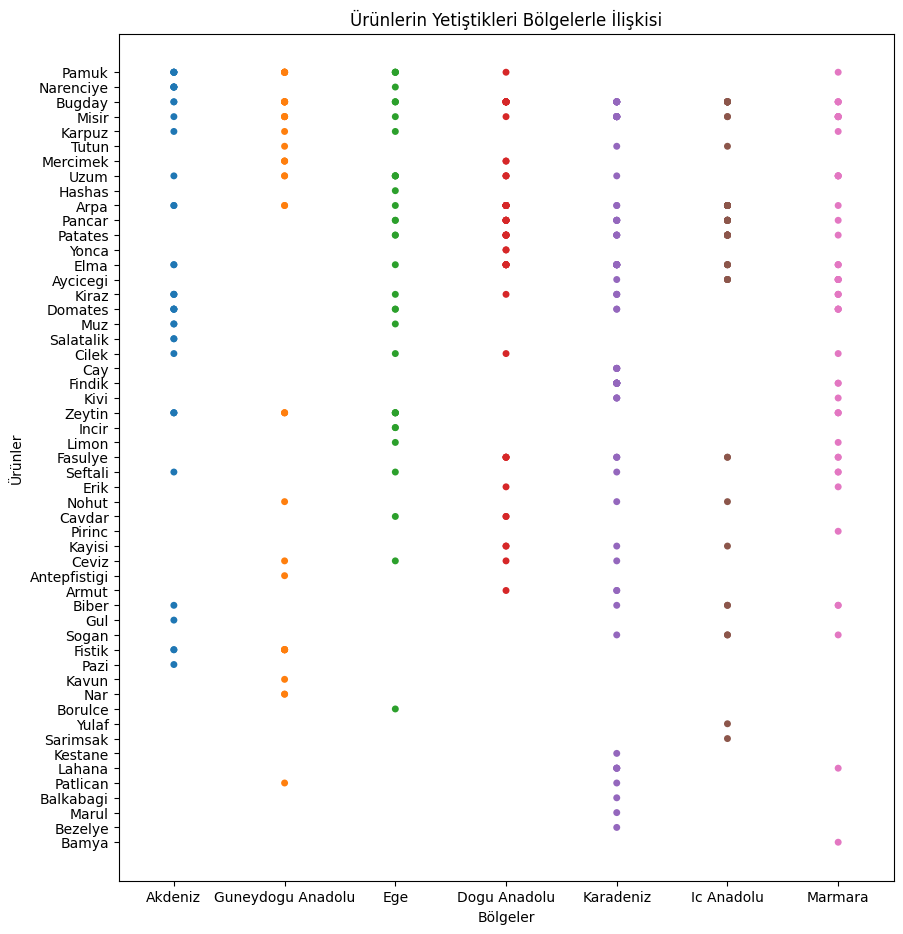

In [118]:
dt_gorsel_icin = dt.copy()

urunidden_isme = {v: k for k, v in dt_urun_dict.items()}
bolgeidden_isme = {v: k for k, v in bolge_dict.items()}

#Çevirme Kısmı
dt_gorsel_icin['Urun_ismi'] = dt['Urun'].map(urunidden_isme)
dt_gorsel_icin['Bolge_ismi'] = dt['BolgeId'].map(bolgeidden_isme)

plt.figure(figsize=(10, 11))
sns.stripplot(
    x="Bolge_ismi", 
    y="Urun_ismi", 
    hue="Bolge_ismi",  
    data=dt_gorsel_icin, 
    jitter=False
)
plt.title("Ürünlerin Yetiştikleri Bölgelerle İlişkisi")
plt.xlabel("Bölgeler")
plt.ylabel("Ürünler")
plt.show()

In [119]:
import pickle
pickle.dump(dtc, open('model.pkl', 'wb'))
pickle.dump(ms, open('minmaxscaler.pkl', 'wb'))
pickle.dump(sc, open('standscaler.pkl', 'wb'))